<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Deep-learning-models/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks

<!-- Name : Jyoti S Shukla

Roll Number : 211022003 -->

References : 

  1. https://towardsdatascience.com/gans-from-scratch-8f5da17b3fb4

#**Problem 1** : Understanding and Training Vanilla GANs  

1. Consider MNIST Digit Dataset
2. Create a Generator and a Discriminator Network and train the network. Follow this article : https://medium.com/ai-society/gans-from-scratch-1-a-deep-introduction-with-code-in-pytorch-and-tensorflow-cb03cdcdba0f
3. Explain briefly about your understanding of GANs

##Write down the Objectives, Hypothesis and Experimental description for the above problem


**Objective:** To show the implementation of basic GAN on MNIST dataset.

**Hypothesis:** The GAN model must be able to train on the dataset and generate samples similar to the real samples from the dataset.

**Experimental Description:**

1. The implementation of GAN is done using pytorch and tensorflow.
2. The dataset is loaded and processed.
3. The generator and discriminator models are defined along with their forward pass functions.
4. The model is fit to the training dataset.
5. The generator and discriminator loss are observed.

# **GAN Architecture**

Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models: the generator model that we train to generate new examples, and the discriminator model that tries to classify examples as either real (from the domain) or fake (generated). 

**The Generator Model**

The generator model takes a fixed-length random vector as input and generates a sample in the domain.The vector is drawn from randomly from a Gaussian distribution, and the vector is used to seed the generative process.After training, points in this multidimensional vector space will correspond to points in the problem domain, forming a compressed representation of the data distribution.

**The Discriminator Model**

The discriminator model takes an example from the domain as input (real or generated) and predicts a binary class label of real or fake (generated).The real example comes from the training dataset. The generated examples are output by the generator model.The discriminator is a normal (and well understood) classification model.After the training process, the discriminator model is discarded as we are interested in the generator.

**The two player game**

Generator and discriminator works in sync with each other. The objective function which is being optimized during training is defined combindly as a minmax function as below:

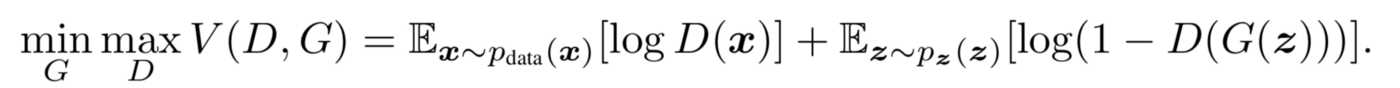

**GAN Architecture**

The GAN architecture looks like below:

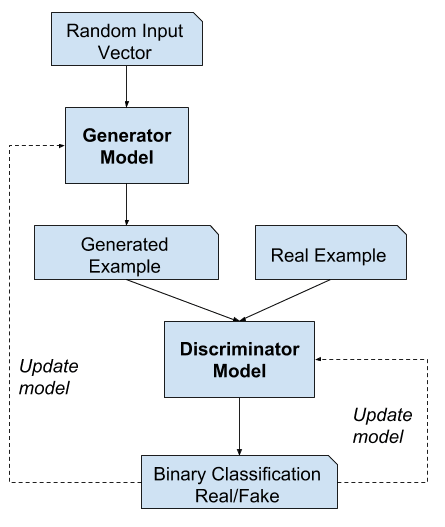


The fundamental steps to train a GAN can be described as following:

1.Sample a noise set and a real-data set, each with size m.

2.Train the Discriminator on this data.

3.Sample a different noise subset with size m.

4.Train the Generator on this data.

5.Repeat from Step 1.

## Programming : 
  Please write a program to demonstrate the same

# Tensorflow

In [ ]:
from IPython import display

from torch.utils.data import DataLoader
from torchvision import transforms, datasets

#from utils import Logger

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
DATA_FOLDER = './tf_data/VGAN/MNIST'
IMAGE_PIXELS = 28*28
NOISE_SIZE = 100
BATCH_SIZE = 100

In [ ]:
def noise(n_rows, n_cols):
    return np.random.normal(size=(n_rows, n_cols))

def xavier_init(size):
    in_dim = size[0] if len(size) == 1 else size[1]
    stddev = 1. / np.sqrt(float(in_dim))
    return tf.random_uniform(shape=size, minval=-stddev, maxval=stddev)

def images_to_vectors(images):
    return images.reshape(images.shape[0], 784)

def vectors_to_images(vectors):
    return vectors.reshape(vectors.shape[0], 28, 28, 1)

In [ ]:
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
    out_dir = '{}/dataset'.format(DATA_FOLDER)
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)

In [ ]:
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [ ]:
## Discriminator

# Input
X = tf.placeholder(tf.float32, shape=(None, IMAGE_PIXELS))

# Layer 1 Variables
D_W1 = tf.Variable(xavier_init([784, 1024]))
D_B1 = tf.Variable(xavier_init([1024]))

# Layer 2 Variables
D_W2 = tf.Variable(xavier_init([1024, 512]))
D_B2 = tf.Variable(xavier_init([512]))

# Layer 3 Variables
D_W3 = tf.Variable(xavier_init([512, 256]))
D_B3 = tf.Variable(xavier_init([256]))

# Out Layer Variables
D_W4 = tf.Variable(xavier_init([256, 1]))
D_B4 = tf.Variable(xavier_init([1]))

# Store Variables in list
D_var_list = [D_W1, D_B1, D_W2, D_B2, D_W3, D_B3, D_W4, D_B4]

In [ ]:
## Generator

# Input
Z = tf.placeholder(tf.float32, shape=(None, NOISE_SIZE))

# Layer 1 Variables
G_W1 = tf.Variable(xavier_init([100, 256]))
G_B1 = tf.Variable(xavier_init([256]))

# Layer 2 Variables
G_W2 = tf.Variable(xavier_init([256, 512]))
G_B2 = tf.Variable(xavier_init([512]))

# Layer 3 Variables
G_W3 = tf.Variable(xavier_init([512, 1024]))
G_B3 = tf.Variable(xavier_init([1024]))

# Out Layer Variables
G_W4 = tf.Variable(xavier_init([1024, 784]))
G_B4 = tf.Variable(xavier_init([784]))

# Store Variables in list
G_var_list = [G_W1, G_B1, G_W2, G_B2, G_W3, G_B3, G_W4, G_B4]

In [ ]:
def discriminator(x):
    l1 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(x,   D_W1) + D_B1, .2), .3)
    l2 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(l1,  D_W2) + D_B2, .2), .3)
    l3 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(l2,  D_W3) + D_B3, .2), .3)
    out = tf.matmul(l3, D_W4) + D_B4
    return out

def generator(z):
    l1 = tf.nn.leaky_relu(tf.matmul(z,  G_W1) + G_B1, .2)
    l2 = tf.nn.leaky_relu(tf.matmul(l1, G_W2) + G_B2, .2)
    l3 = tf.nn.leaky_relu(tf.matmul(l2, G_W3) + G_B3, .2)
    out = tf.nn.tanh(tf.matmul(l3, G_W4) + G_B4)
    return out

In [ ]:
G_sample = generator(Z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

# Losses
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.zeros_like(D_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.ones_like(D_fake)))

# Optimizers
D_opt = tf.train.AdamOptimizer(2e-4).minimize(D_loss, var_list=D_var_list)
G_opt = tf.train.AdamOptimizer(2e-4).minimize(G_loss, var_list=G_var_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
num_test_samples = 16
test_noise = noise(num_test_samples, NOISE_SIZE)

In [ ]:
num_epochs = 150

# Start interactive session
session = tf.InteractiveSession()
# Init Variables
tf.global_variables_initializer().run()
# Init Logger
logger = Logger(model_name='DCGAN1', data_name='CIFAR10')

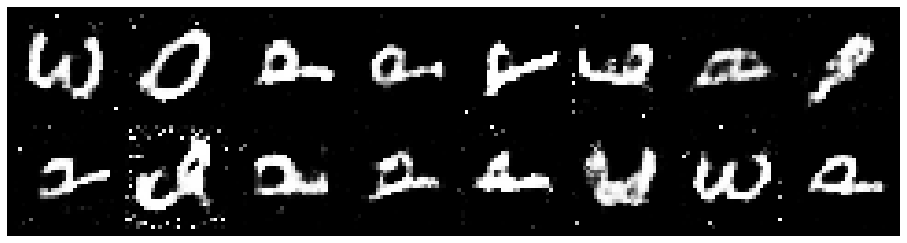

Epoch: [149/150], Batch Num: [500/600]
Discriminator Loss: 1.3942, Generator Loss: 0.7510
D(x): 0.0372, D(G(z)): -0.0430


In [ ]:
# Iterate through epochs
for epoch in range(num_epochs):
    for n_batch, (batch,_) in enumerate(data_loader):
        
        # 1. Train Discriminator
        X_batch = images_to_vectors(batch.permute(0, 2, 3, 1).numpy())
        feed_dict = {X: X_batch, Z: noise(BATCH_SIZE, NOISE_SIZE)}
        _, d_error, d_pred_real, d_pred_fake = session.run(
            [D_opt, D_loss, D_real, D_fake], feed_dict=feed_dict
        )

        # 2. Train Generator
        feed_dict = {Z: noise(BATCH_SIZE, NOISE_SIZE)}
        _, g_error = session.run(
            [G_opt, G_loss], feed_dict=feed_dict
        )

        if n_batch % 100 == 0:
            display.clear_output(True)
            # Generate images from test noise
            test_images = session.run(
                G_sample, feed_dict={Z: test_noise}
            )
            test_images = vectors_to_images(test_images)
            # Log Images
            logger.log_images(test_images, num_test_samples, epoch, n_batch, num_batches, format='NHWC');
            # Log Status
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )

## Inferences and Conclusion : State all the key observations and conclusion

1. For 200 epochs, the generator loss was 0.7277 and discriminator loss was 1.3250.

2. For 150 epochs, the generator loss was 0.751 and discriminator loss was 0.0372.

3. The generator was able to partially learn the original sample.

# Using Keras

In [ ]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam 

import matplotlib.pyplot as plt

import sys

import numpy as np

In [ ]:
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % (2*sample_interval) == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images%d.png" % epoch)
        plt.show()
        plt.close()


In [ ]:
(X_train, _), (_, _) = mnist.load_data()
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)
idx = np.random.randint(0, X_train.shape[0], 32)
imgs = X_train[idx]

11501568/11490434 [==============================] - 0s 0us/step


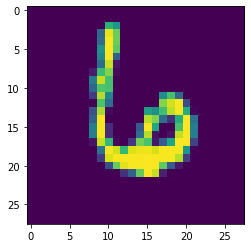

In [ ]:
plt.imshow(imgs[1].reshape(28,28))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trai

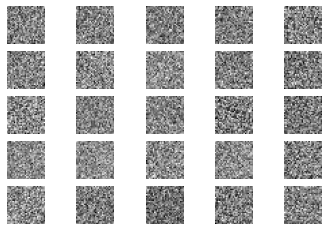

1 [D loss: 0.305895, acc.: 99.22%] [G loss: 0.828552]
2 [D loss: 0.297405, acc.: 94.53%] [G loss: 0.860555]
3 [D loss: 0.287157, acc.: 95.31%] [G loss: 0.934289]
4 [D loss: 0.291651, acc.: 94.53%] [G loss: 1.008481]
5 [D loss: 0.231352, acc.: 99.22%] [G loss: 1.205980]
6 [D loss: 0.209266, acc.: 100.00%] [G loss: 1.348537]
7 [D loss: 0.203543, acc.: 100.00%] [G loss: 1.538605]
8 [D loss: 0.141055, acc.: 100.00%] [G loss: 1.657362]
9 [D loss: 0.139872, acc.: 99.22%] [G loss: 1.837876]
10 [D loss: 0.112384, acc.: 100.00%] [G loss: 2.110374]
11 [D loss: 0.096328, acc.: 100.00%] [G loss: 2.136129]
12 [D loss: 0.083610, acc.: 100.00%] [G loss: 2.295377]
13 [D loss: 0.075160, acc.: 100.00%] [G loss: 2.344994]
14 [D loss: 0.071983, acc.: 100.00%] [G loss: 2.462675]
15 [D loss: 0.061851, acc.: 100.00%] [G loss: 2.573859]
16 [D loss: 0.063825, acc.: 100.00%] [G loss: 2.767030]
17 [D loss: 0.050988, acc.: 100.00%] [G loss: 2.704881]
18 [D loss: 0.048455, acc.: 100.00%] [G loss: 2.895788]
19 [D l

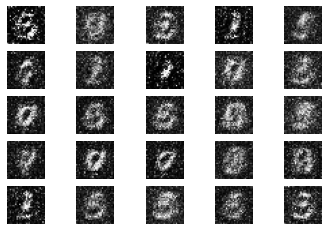

401 [D loss: 0.665438, acc.: 53.12%] [G loss: 0.663053]
402 [D loss: 0.672413, acc.: 49.22%] [G loss: 0.662437]
403 [D loss: 0.665324, acc.: 50.78%] [G loss: 0.685089]
404 [D loss: 0.665830, acc.: 50.00%] [G loss: 0.687931]
405 [D loss: 0.675155, acc.: 51.56%] [G loss: 0.678043]
406 [D loss: 0.661478, acc.: 54.69%] [G loss: 0.692521]
407 [D loss: 0.659552, acc.: 53.91%] [G loss: 0.680584]
408 [D loss: 0.657912, acc.: 49.22%] [G loss: 0.683450]
409 [D loss: 0.660933, acc.: 53.12%] [G loss: 0.683270]
410 [D loss: 0.644870, acc.: 51.56%] [G loss: 0.679468]
411 [D loss: 0.653978, acc.: 54.69%] [G loss: 0.673604]
412 [D loss: 0.647716, acc.: 51.56%] [G loss: 0.676932]
413 [D loss: 0.638935, acc.: 56.25%] [G loss: 0.662058]
414 [D loss: 0.654107, acc.: 56.25%] [G loss: 0.665339]
415 [D loss: 0.649875, acc.: 58.59%] [G loss: 0.681710]
416 [D loss: 0.671247, acc.: 53.12%] [G loss: 0.693800]
417 [D loss: 0.639815, acc.: 60.94%] [G loss: 0.709334]
418 [D loss: 0.653756, acc.: 55.47%] [G loss: 0.

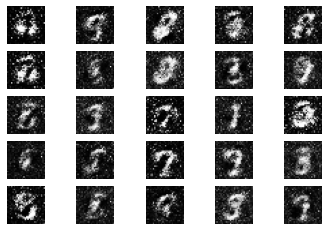

801 [D loss: 0.603312, acc.: 71.09%] [G loss: 0.816911]
802 [D loss: 0.609359, acc.: 71.88%] [G loss: 0.812544]
803 [D loss: 0.607420, acc.: 71.09%] [G loss: 0.825291]
804 [D loss: 0.613363, acc.: 71.09%] [G loss: 0.847433]
805 [D loss: 0.608318, acc.: 68.75%] [G loss: 0.810285]
806 [D loss: 0.601020, acc.: 70.31%] [G loss: 0.827208]
807 [D loss: 0.598149, acc.: 73.44%] [G loss: 0.813802]
808 [D loss: 0.595656, acc.: 70.31%] [G loss: 0.843615]
809 [D loss: 0.646219, acc.: 64.06%] [G loss: 0.812468]
810 [D loss: 0.597329, acc.: 71.88%] [G loss: 0.811260]
811 [D loss: 0.636095, acc.: 59.38%] [G loss: 0.816598]
812 [D loss: 0.618903, acc.: 71.09%] [G loss: 0.843749]
813 [D loss: 0.609252, acc.: 76.56%] [G loss: 0.846319]
814 [D loss: 0.619728, acc.: 71.09%] [G loss: 0.819556]
815 [D loss: 0.615613, acc.: 64.06%] [G loss: 0.802833]
816 [D loss: 0.610317, acc.: 67.19%] [G loss: 0.826525]
817 [D loss: 0.594325, acc.: 76.56%] [G loss: 0.844622]
818 [D loss: 0.607806, acc.: 75.78%] [G loss: 0.

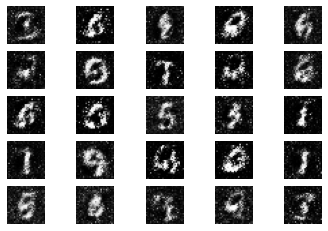

1201 [D loss: 0.587471, acc.: 75.78%] [G loss: 0.965744]
1202 [D loss: 0.571653, acc.: 78.12%] [G loss: 0.942947]
1203 [D loss: 0.594700, acc.: 71.09%] [G loss: 0.956902]
1204 [D loss: 0.564943, acc.: 75.00%] [G loss: 0.934767]
1205 [D loss: 0.629993, acc.: 61.72%] [G loss: 0.930852]
1206 [D loss: 0.585489, acc.: 77.34%] [G loss: 0.982069]
1207 [D loss: 0.603407, acc.: 69.53%] [G loss: 1.014177]
1208 [D loss: 0.576930, acc.: 73.44%] [G loss: 1.010126]
1209 [D loss: 0.617150, acc.: 64.06%] [G loss: 0.936768]
1210 [D loss: 0.592832, acc.: 74.22%] [G loss: 0.935107]
1211 [D loss: 0.578658, acc.: 73.44%] [G loss: 0.904433]
1212 [D loss: 0.594944, acc.: 71.88%] [G loss: 0.901458]
1213 [D loss: 0.600423, acc.: 69.53%] [G loss: 0.988184]
1214 [D loss: 0.542945, acc.: 77.34%] [G loss: 0.978957]
1215 [D loss: 0.566542, acc.: 77.34%] [G loss: 0.960783]
1216 [D loss: 0.579431, acc.: 71.88%] [G loss: 0.991574]
1217 [D loss: 0.568918, acc.: 75.00%] [G loss: 0.984957]
1218 [D loss: 0.532576, acc.: 8

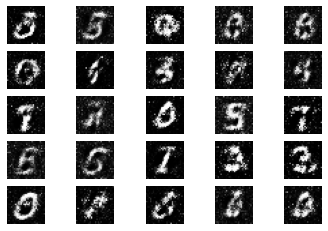

1601 [D loss: 0.611265, acc.: 69.53%] [G loss: 0.971036]
1602 [D loss: 0.588953, acc.: 72.66%] [G loss: 0.943083]
1603 [D loss: 0.587109, acc.: 71.88%] [G loss: 0.934394]
1604 [D loss: 0.607153, acc.: 62.50%] [G loss: 0.913569]
1605 [D loss: 0.552348, acc.: 78.12%] [G loss: 0.938156]
1606 [D loss: 0.563863, acc.: 74.22%] [G loss: 0.917623]
1607 [D loss: 0.570691, acc.: 68.75%] [G loss: 0.946709]
1608 [D loss: 0.604413, acc.: 70.31%] [G loss: 0.986990]
1609 [D loss: 0.571824, acc.: 74.22%] [G loss: 0.993024]
1610 [D loss: 0.603684, acc.: 69.53%] [G loss: 0.936603]
1611 [D loss: 0.548226, acc.: 77.34%] [G loss: 0.948487]
1612 [D loss: 0.571249, acc.: 75.00%] [G loss: 0.962149]
1613 [D loss: 0.550740, acc.: 78.91%] [G loss: 0.944284]
1614 [D loss: 0.570967, acc.: 76.56%] [G loss: 0.957623]
1615 [D loss: 0.541683, acc.: 78.91%] [G loss: 0.952660]
1616 [D loss: 0.621481, acc.: 64.84%] [G loss: 0.922363]
1617 [D loss: 0.600367, acc.: 65.62%] [G loss: 0.959866]
1618 [D loss: 0.556718, acc.: 7

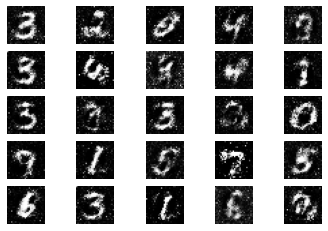

2001 [D loss: 0.571998, acc.: 72.66%] [G loss: 1.028561]
2002 [D loss: 0.619523, acc.: 61.72%] [G loss: 1.029588]
2003 [D loss: 0.598951, acc.: 70.31%] [G loss: 0.969650]
2004 [D loss: 0.588786, acc.: 69.53%] [G loss: 0.967514]
2005 [D loss: 0.585516, acc.: 70.31%] [G loss: 0.960935]
2006 [D loss: 0.600390, acc.: 71.88%] [G loss: 0.948482]
2007 [D loss: 0.584869, acc.: 75.78%] [G loss: 0.885106]
2008 [D loss: 0.591524, acc.: 71.09%] [G loss: 0.926530]
2009 [D loss: 0.595063, acc.: 68.75%] [G loss: 0.894743]
2010 [D loss: 0.577462, acc.: 71.09%] [G loss: 0.911036]
2011 [D loss: 0.604951, acc.: 72.66%] [G loss: 0.895141]
2012 [D loss: 0.609181, acc.: 69.53%] [G loss: 0.958509]
2013 [D loss: 0.588457, acc.: 75.00%] [G loss: 0.974134]
2014 [D loss: 0.605067, acc.: 69.53%] [G loss: 0.983356]
2015 [D loss: 0.583677, acc.: 69.53%] [G loss: 0.946221]
2016 [D loss: 0.555127, acc.: 74.22%] [G loss: 0.944397]
2017 [D loss: 0.594037, acc.: 65.62%] [G loss: 0.933578]
2018 [D loss: 0.585326, acc.: 6

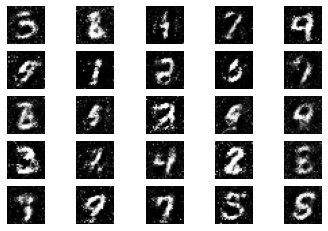

2401 [D loss: 0.604143, acc.: 64.84%] [G loss: 0.956643]
2402 [D loss: 0.588109, acc.: 69.53%] [G loss: 0.933861]
2403 [D loss: 0.590647, acc.: 71.88%] [G loss: 0.958561]
2404 [D loss: 0.591174, acc.: 71.88%] [G loss: 0.934964]
2405 [D loss: 0.573123, acc.: 76.56%] [G loss: 0.985646]
2406 [D loss: 0.605153, acc.: 67.97%] [G loss: 0.932230]
2407 [D loss: 0.564406, acc.: 74.22%] [G loss: 0.965499]
2408 [D loss: 0.573039, acc.: 71.09%] [G loss: 0.959325]
2409 [D loss: 0.637013, acc.: 62.50%] [G loss: 0.958281]
2410 [D loss: 0.606132, acc.: 67.97%] [G loss: 0.959216]
2411 [D loss: 0.557217, acc.: 76.56%] [G loss: 0.929895]
2412 [D loss: 0.589809, acc.: 69.53%] [G loss: 0.990848]
2413 [D loss: 0.609310, acc.: 71.09%] [G loss: 1.002077]
2414 [D loss: 0.639683, acc.: 56.25%] [G loss: 0.988016]
2415 [D loss: 0.570001, acc.: 71.88%] [G loss: 1.043993]
2416 [D loss: 0.604038, acc.: 68.75%] [G loss: 0.977587]
2417 [D loss: 0.573903, acc.: 68.75%] [G loss: 0.961480]
2418 [D loss: 0.560898, acc.: 7

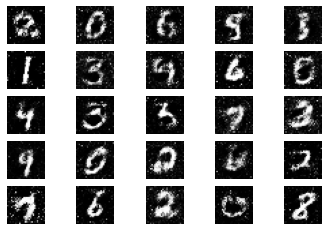

2801 [D loss: 0.637464, acc.: 64.84%] [G loss: 0.920237]
2802 [D loss: 0.602847, acc.: 71.88%] [G loss: 0.941054]
2803 [D loss: 0.629943, acc.: 64.84%] [G loss: 0.993512]
2804 [D loss: 0.574127, acc.: 73.44%] [G loss: 0.934040]
2805 [D loss: 0.649051, acc.: 65.62%] [G loss: 0.933388]
2806 [D loss: 0.618715, acc.: 66.41%] [G loss: 0.932240]
2807 [D loss: 0.605964, acc.: 69.53%] [G loss: 0.948661]
2808 [D loss: 0.587873, acc.: 71.09%] [G loss: 1.009907]
2809 [D loss: 0.589477, acc.: 69.53%] [G loss: 0.949550]
2810 [D loss: 0.645041, acc.: 63.28%] [G loss: 0.985451]
2811 [D loss: 0.600868, acc.: 72.66%] [G loss: 0.936436]
2812 [D loss: 0.608948, acc.: 71.09%] [G loss: 0.986175]
2813 [D loss: 0.586712, acc.: 67.97%] [G loss: 0.913585]
2814 [D loss: 0.599004, acc.: 68.75%] [G loss: 0.859898]
2815 [D loss: 0.596214, acc.: 67.19%] [G loss: 1.016362]
2816 [D loss: 0.580255, acc.: 74.22%] [G loss: 0.945136]
2817 [D loss: 0.570790, acc.: 73.44%] [G loss: 0.953093]
2818 [D loss: 0.538312, acc.: 7

In [ ]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=3000, batch_size=64, sample_interval=200)

**Inference and Conclusion**

1. The generator model was able to learn the input data accurately.

2. Accuracy of around 75% for discriminator was achieved. 

3. On changing batch size for sample and real data the output varies. 

4. GAN was able to generate similar data type from noisy test inputs.